# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Karta Kusuma
- **Email:** -
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Bagaimana rasio jumlah pelanggan yang aktif dan kurang aktif melakukan pembelian pada tahun 2018?
- Bagaimana laju perubahan jumlah pelanggan yang aktif dan kurang aktif melakukan pembelian per tanggal pada tahun 2018?
- Kota apa yang memiliki jumlah pelanggan yang aktif dan kurang aktif (melakukan pembelian) terbanyak selama tahun 2018?
- Negara bagian apa yang memiliki jumlah pelanggan yang aktif dan kurang aktif (melakukan pembelian) terbanyak selama tahun 2018?

## Import Semua Packages/Library yang Digunakan

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [121]:
def detail_df(df, name):
  print(f'# Columns: \n{df.columns}')
  print(f'# Head: \n{df.head()}')
  print(f'# Shape: \n{df.shape}')
  print (f'# Insights: \nDataset {name} memiliki {df.shape[1]} kolom, antara lain: {", ".join(df.columns)}. Jumlah record pada dataset ini adalah {df.shape[0]} data.')

#### Customers Dataset

In [122]:
df_customers = pd.read_csv('/content/customers_dataset.csv')
detail_df(df_customers, 'Customers Dataset')

# Columns: 
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
# Head: 
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             

**Insight:**
- Dataset Customers Dataset memiliki 5 kolom, antara lain: customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state. Jumlah record pada dataset ini adalah 99441 data.

#### Orders Dataset

In [123]:
df_orders = pd.read_csv('/content/orders_dataset.csv')
detail_df(df_orders, 'Orders Dataset')

# Columns: 
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
# Head: 
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-1

**Insight:**
- Dataset Orders Dataset memiliki 8 kolom, antara lain: order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date. Jumlah record pada dataset ini adalah 99441 data.

### Assessing Data

In [124]:
def assessing_df(df):
  df.info()
  print(f'# Duplicate: \n{df.duplicated().sum()}')
  print(f'# Null: \n{df.isna().sum()}')

#### Assessing Customers Dataset

In [125]:
assessing_df(df_customers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
# Duplicate: 
0
# Null: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


**Insight:**
- Data pada dataset costumers tidak memerlukan penanganan lebih lanjut

#### Assessing Orders Dataset

In [126]:
assessing_df(df_orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
# Duplicate: 
0
# Null: 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_del

**Insight:**
- Terdapat data yang bernilai null pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date
- Terdapat data timestamp yang tipe datanya masih berupa string

### Cleaning Data

#### Cleaning Orders Dataset

1. Menangani data bernilai null

*Kolom yang memiliki nilai null dapat dihilangkan karena tidak diperlukan untuk menjawab pertanyaan yang ada*

In [127]:
df_orders_rcolumns = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
df_orders_cleaned = df_orders.drop(columns=df_orders_rcolumns, axis=1)
df_orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


2. Menangani data timestamp yang tipe datanya kurang sesuai

In [128]:
df_orders_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_orders_cleaned['order_purchase_timestamp'])
df_orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


**Insight:**
- Kolom dengan data yang null dihilangkan karena tidak diperlukan dalam menjawab pertanyaan yang ada
- Tipe data kolom order_purchase_timestamp diubah menjadi datetime agar bisa diproses sebagai tanggal dan waktu

## Exploratory Data Analysis (EDA)

### Exploring Customers Dataset

In [129]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [130]:
df_customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [131]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Sebagian besar pelanggan berasal dari kota sao paulo
- Sebagian besar pelanggan berasal dari negara bagian SP

### Exploring Order Customer Dataset

In [132]:
df_order_customer = pd.merge(df_orders_cleaned, df_customers, on='customer_id', how='inner')
df_order_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [133]:
df_order_customer.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441,99441.000000,99441,99441
unique,99441,99441,8,NaN,96096,NaN,4119,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96478,NaN,17,NaN,15540,41746
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,35137.474583,NaN,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,58900.000000,NaN,NaN
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,99990.000000,NaN,NaN


Memfilter dataset order customer dengan tahun order 2018 dan membuat kolom date untuk menyinpan tanggal

In [134]:
df_order_customer_2018 = df_order_customer[df_order_customer['order_purchase_timestamp'].dt.year == 2018].copy()
df_order_customer_2018['date'] = df_order_customer_2018['order_purchase_timestamp'].dt.date
df_order_customer_2018.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,date
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-08
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-13
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,e97109680b052ee858d93a539597bba7,35400,ouro preto,MG,2018-06-07
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,e2dfa3127fedbbca9707b36304996dab,4812,sao paulo,SP,2018-07-25


In [135]:
df_order_customer_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54011 entries, 1 to 99440
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  54011 non-null  object        
 1   customer_id               54011 non-null  object        
 2   order_status              54011 non-null  object        
 3   order_purchase_timestamp  54011 non-null  datetime64[ns]
 4   customer_unique_id        54011 non-null  object        
 5   customer_zip_code_prefix  54011 non-null  int64         
 6   customer_city             54011 non-null  object        
 7   customer_state            54011 non-null  object        
 8   date                      54011 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 6.1+ MB


Menghitung jumlah pelanggan yang aktif dan kurang aktif melakukan pembelian selama tahun 2018

In [136]:
active_customer = df_order_customer_2018['customer_id'].drop_duplicates().reset_index(drop=True)
inactive_customer = df_customers[~df_customers['customer_id'].isin(active_customer)]['customer_id'].reset_index(drop=True)
print(f'Pelanggan aktif: {len(active_customer)} vs Pelanggan kurang aktif: {len(inactive_customer)}')

Pelanggan aktif: 54011 vs Pelanggan kurang aktif: 45430


Menganalisis laju perubahan pelanggan yang aktif dan kurang aktif dalam melakukan pembelian per tanggal selama tahun 2018

In [137]:
daily_active_customers = {}
daily_inactive_customers = {}

start_date = df_order_customer_2018['date'].min()
end_date = df_order_customer_2018['date'].max()
date_range = pd.date_range(start=start_date, end=end_date).date

all_customers = set(df_customers['customer_id'].unique())
for date in date_range:
  active_customers_on_date = set(df_order_customer_2018[df_order_customer_2018['date'] == date]['customer_id'].unique())
  daily_active_customers[date] = len(active_customers_on_date)

  inactive_customers_on_date = all_customers - active_customers_on_date
  daily_inactive_customers[date] = len(inactive_customers_on_date)

daily_active_customers = pd.Series(daily_active_customers)
daily_inactive_customers = pd.Series(daily_inactive_customers)
print(f'Pelanggan aktif: {daily_active_customers.head()}')
print(f'Pelanggan kurang aktif: {daily_inactive_customers.head()}')

Pelanggan aktif: 2018-01-01     74
2018-01-02    204
2018-01-03    225
2018-01-04    258
2018-01-05    210
dtype: int64
Pelanggan kurang aktif: 2018-01-01    99367
2018-01-02    99237
2018-01-03    99216
2018-01-04    99183
2018-01-05    99231
dtype: int64


Mencari kota dengan jumlah pelanggan yang aktif dan kurang aktif (melakukan pembelian) terbanyak selama tahun 2018

In [138]:
active_customer_city = df_order_customer_2018.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
active_customer_city

,customer_id
customer_city,
sao paulo,9123
rio de janeiro,3503
belo horizonte,1555
brasilia,1213
curitiba,864
...,...
goianinha,1
pranchita,1
praia norte,1


In [139]:
inactive_customer_city = df_customers[df_customers['customer_id'].isin(inactive_customer)].groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
inactive_customer_city

,customer_id
customer_city,
sao paulo,6417
rio de janeiro,3379
belo horizonte,1218
brasilia,918
porto alegre,698
...,...
lagoa da canoa,1
lago verde,1
ladario,1


Mencari negara bagian dengan jumlah pelanggan yang aktif dan kurang aktif (melakukan pembelian) terbanyak selama tahun 2018

In [140]:
active_customer_state = df_order_customer_2018.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False)
active_customer_state

,customer_id
customer_state,
SP,23871
RJ,6571
MG,6181
RS,2780
PR,2755
SC,1906
BA,1784
DF,1213
ES,1061


In [141]:
inactive_customer_state = df_customers[df_customers['customer_id'].isin(inactive_customer)].groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False)
inactive_customer_state

,customer_id
customer_state,
SP,17875
RJ,6281
MG,5454
RS,2686
PR,2290
SC,1731
BA,1596
ES,972
GO,964


Menyimpan dataset customer dan order customer 2018

In [142]:
df_customers.to_csv('customers_final.csv', index=False)
df_order_customer_2018.to_csv('order_customer_2018_final.csv', index=False)

**Insight:**
- Jumlah pelanggan yang aktif melakukan pembelian pada tahun 2018 adalah 54011 pelanggan. Sedangkan, jumlah pelanggan yang kurang aktif melakukan pembelian adalah 45430 pelanggan.
- Jumlah pelanggan yang aktif melakukan pembelian tiap per hari cukup rendah apabila dibandingkan dengan total seluruh pelanggan yang ada
- Kota yang memiliki pelanggan aktif dan kurang aktif (melakukan pembelian) terbanyak pada tahun 2018 adalah kota Sao Paulo
- Negara Bagian yang memiliki pelanggan aktif dan kurang aktif (melakukan pembelian) terbanyak pada tahun 2018 adalah negara bagian SP

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana rasio jumlah pelanggan yang aktif dan kurang aktif melakukan pembelian pada tahun 2018?

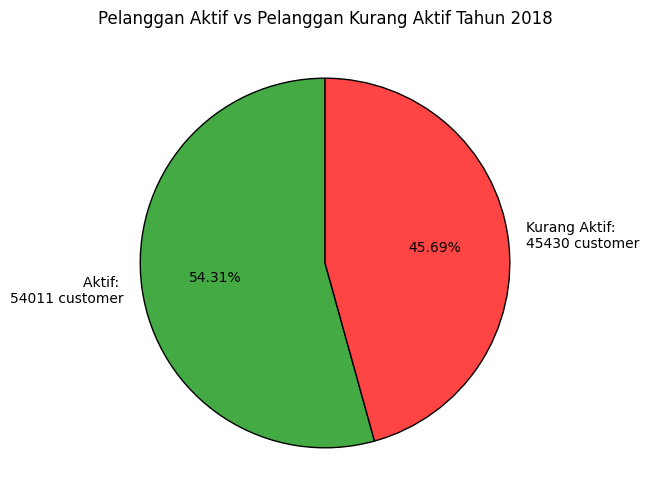

In [143]:
labels = [f'Aktif: \n{len(active_customer)} customer', f'Kurang Aktif: \n{len(inactive_customer)} customer']
sizes = [len(active_customer), len(inactive_customer)]
colors = ['#44AA44', '#FF4444']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Pelanggan Aktif vs Pelanggan Kurang Aktif Tahun 2018')
plt.show()

**Insight:**
- Rasio perbandingan jumlah pelanggan yang aktif dan kurang aktif dalam melakukan pembelian pada tahun 2018 adalah 54,31 : 45,69 dari total jumlah pelanggan
- Persentase jumlah pelanggan yang kurang aktif dalam melakukan pembelian cukup besar, yakni hampir separuh dari total pelanggan

### Pertanyaan 2:

Bagaimana laju perubahan pelanggan yang aktif dan kurang aktif melakukan pembelian per tanggal pada tahun 2018?

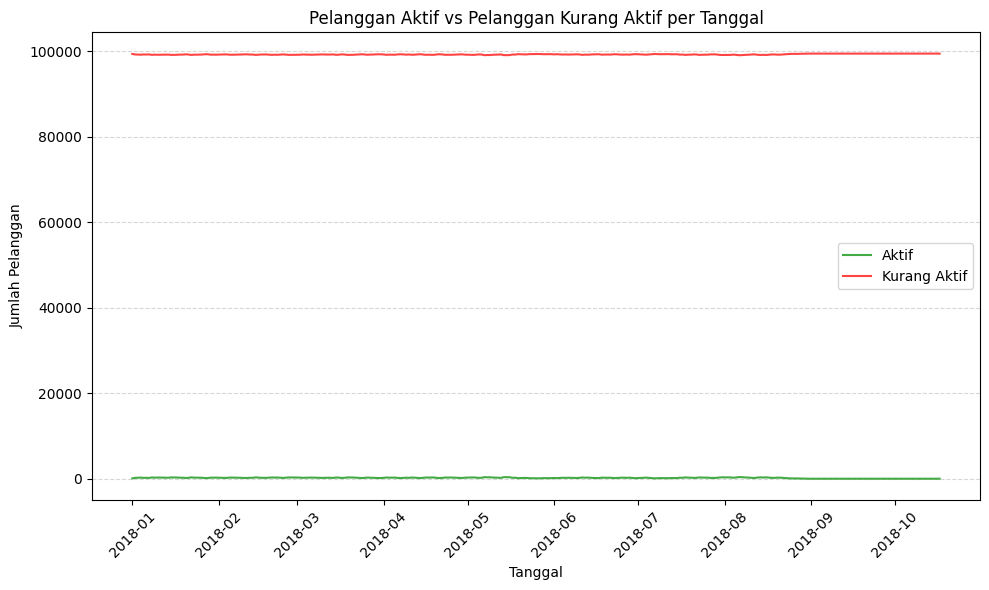

In [144]:
plt.figure(figsize=(10, 6))
plt.plot(daily_active_customers.index, daily_active_customers.values, label='Aktif', color='#44AA44')
plt.plot(daily_inactive_customers.index, daily_inactive_customers.values, label='Kurang Aktif', color='#FF4444')

plt.title('Pelanggan Aktif vs Pelanggan Kurang Aktif per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Insight:**
- Jumlah pelanggan yang aktif melakukan pembelian tiap harinya terbilang sedikit apabila dibandingkan dengan total seluruh pelanggan yang ada

### Pertanyaan 3:

Kota apa yang memiliki jumlah pelanggan yang paling aktif dan kurang aktif (melakukan pembelian) terbanyak selama tahun 2018?

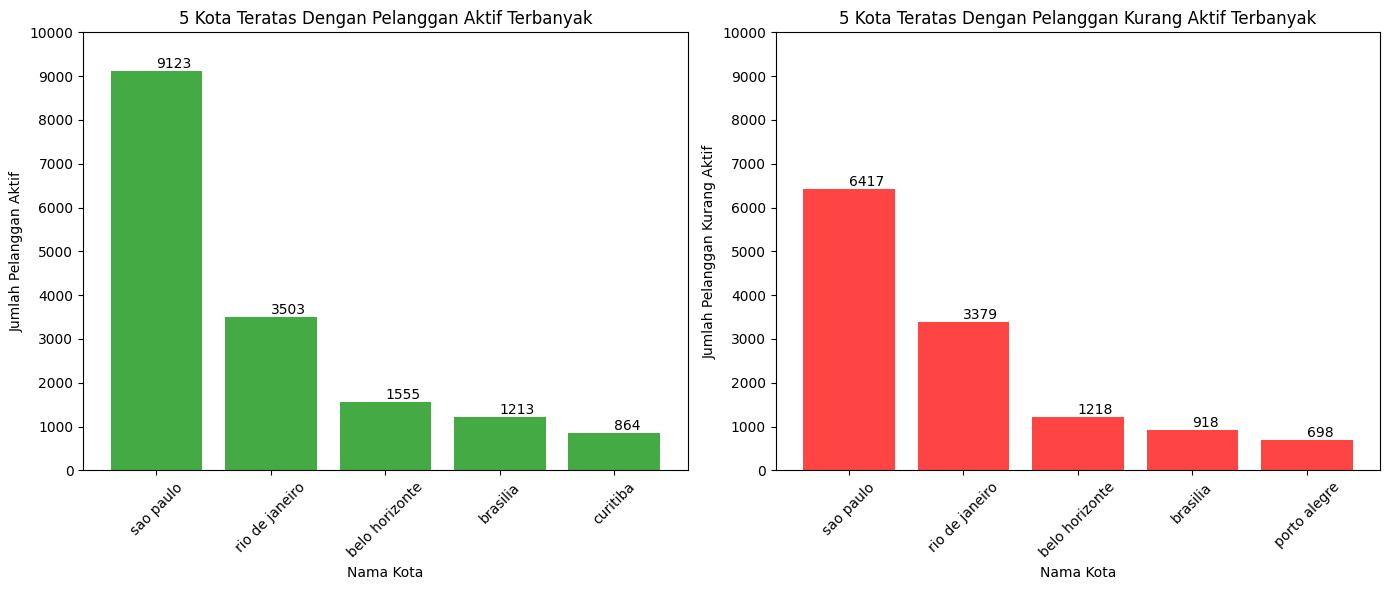

In [145]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

top_active_customer_city = active_customer_city.head(5)
top_inactive_customer_city = inactive_customer_city.head(5)

max_ytick = max(top_active_customer_city.max(), top_inactive_customer_city.max())

# Aktif
bars_city_active = axs[0].bar(top_active_customer_city.index, top_active_customer_city.values, color='#44AA44')
axs[0].set_title('5 Kota Teratas Dengan Pelanggan Aktif Terbanyak')
axs[0].set_yticks(range(0, max_ytick + 1000, 1000))
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xlabel('Nama Kota')
axs[0].set_ylabel('Jumlah Pelanggan Aktif')

for bar in bars_city_active:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom')


# Inaktif
bars_city_inactive = axs[1].bar(top_inactive_customer_city.index, top_inactive_customer_city.values, color='#FF4444')
axs[1].set_title('5 Kota Teratas Dengan Pelanggan Kurang Aktif Terbanyak')
axs[1].set_yticks(range(0, max_ytick + 1000, 1000))
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('Nama Kota')
axs[1].set_ylabel('Jumlah Pelanggan Kurang Aktif')

for bar in bars_city_inactive:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom')


plt.tight_layout()
plt.show()

**Insight:**
- Kota dengan jumlah pelanggan yang aktif dan kurang aktif (melakukan pembelian) terbanyak pada tahun 2018 dipegag oleh kota Sao Paulo
- Rasio pelanggan yang kurang aktif melakukan pembelian pada tahun 2018 cukup besar, yakni hampir sebagian dari total pelanggan di tiap kota

### Pertanyaan 4:

Negara bagian apa yang memiliki jumlah pelanggan yang paling aktif dan kurang aktif (melakukan pembelian) terbanyak selama tahun 2018?

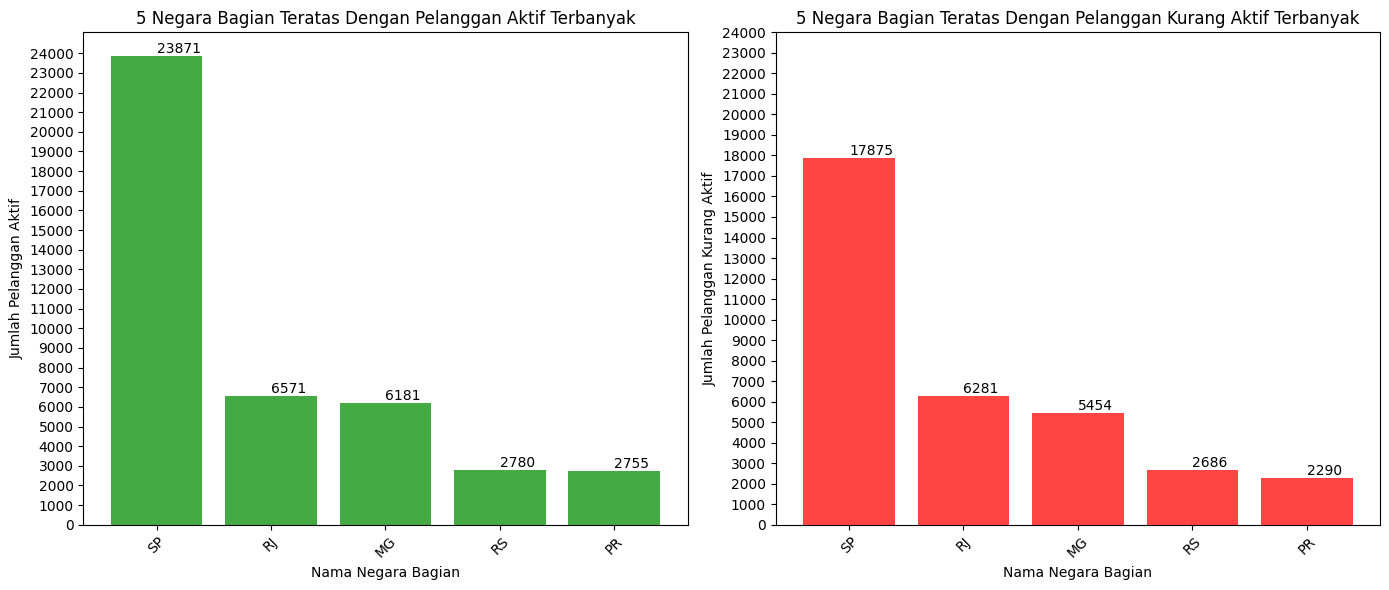

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

top_active_customer_state = active_customer_state.head(5)
top_inactive_customer_state = inactive_customer_state.head(5)

max_ytick = max(top_active_customer_state.max(), top_inactive_customer_state.max())

# Aktif
bars_state_active = axs[0].bar(top_active_customer_state.index, top_active_customer_state.values, color='#44AA44')
axs[0].set_title('5 Negara Bagian Teratas Dengan Pelanggan Aktif Terbanyak')
axs[0].set_yticks(range(0, max_ytick + 1000, 1000))
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xlabel('Nama Negara Bagian')
axs[0].set_ylabel('Jumlah Pelanggan Aktif')

for bar in bars_state_active:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom')


# Inaktif
bars_state_inactive = axs[1].bar(top_inactive_customer_state.index, top_inactive_customer_state.values, color='#FF4444')
axs[1].set_title('5 Negara Bagian Teratas Dengan Pelanggan Kurang Aktif Terbanyak')
axs[1].set_yticks(range(0, max_ytick + 1000, 1000))
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('Nama Negara Bagian')
axs[1].set_ylabel('Jumlah Pelanggan Kurang Aktif')

for bar in bars_state_inactive:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom')


plt.tight_layout()
plt.show()

**Insight:**
- Negara bagian dengan jumlah pelanggan yang aktif dan kurang aktif (melakukan pembelian) terbanyak dipegang oleh negara bagian SP
- Rasio pelanggan yang kurang aktif melakukan pembelian pada tahun 2018 cukup besar, yakni hampir sebagian dari total pelanggan di tiap negara bagian

## Conclusion

- Rasio antara jumlah pelanggan yang aktif dan kurang aktif dalam melakukan pembelian pada tahun 2018 adalah 54,31 : 45,69. Jumlah pelanggan yang kurang aktif melakukan pembelian mencapai 45,69% dari total keseluruhan pelanggan, yang menandakan hampir sebagian besar pelanggan kurang aktif dalam melakukan pembelian. Sehingga, diperlukan sebuah strategi guna meningkatkan jumlah penggunaan atau jumlah pembelian dari pelanggan. Misalnya, dengan memberikan promo yang menarik dan sebagainya.
- Jumlah pelanggan yang aktif melakukan pembelian per hari terbilang sangat sedikit apabila dibandingkan dengan total pelanggan yang ada. Hal ini turut mendukung rasio pelanggan yang kurang aktif melakukan pembelian yang tergolong besar. Oleh karena itu, diperlukan suatu strategi agar jumlah pelanggan yang aktif melakukan pembelian tiap harinya meningkat. Misalnya dengan menerapkan sistem gamifikasi yang dapat mendorong pelanggan untuk sering berinteraksi dan meningkatkan potensi pembelian.
- Kota yang memiliki jumlah pelanggan aktif (dalam melakukan pembelian) terbanyak pada tahun 2018 adalah kota Sao Paulo. Di sisi lain, kota yang memiliki jumlah pelanggan kurang aktif (dalam melakukan pembelian) terbanyak adalah kota Sao Paulo juga. Hal ini mengindikasikan bahwa sebagian besar pelanggan kurang aktif dalam melakukan pembelian meskipun itu di kota yang memiliki pelanggan aktif terbanyak. Fenomena tersebut juga diperkuat dengan jumlah pelanggan kurang aktif yang tergolong besar di kota yang terkategori memiliki jumlah pelanggan aktif yang besar, misalnya: Rio de Janeiro, Belo Horizonte, dan Brasilia. Diperlukan strategi untuk meningkatkan jumlah pelanggan aktif di tiap kota tersebut, misalnya dengan membuat program atau memasarkan produk-produk dari daerah setempat.
- Negara bagian yang memiliki jumlah pelanggan aktif (dalam melakukan pembelian) terbanyak pada tahun 2018 adalah negara bagian SP. Begitu pula dengan jumlah pelanggan kurang aktif terbanyak yang juga dipegang oleh negara bagian ini. Hal ini menunjukkan bahwa negara bagian yang tergolong memiliki jumlah pelanggan aktif besar, tidak serta merta memiliki rasio pelanggan aktif yang lebih besar secara signifikan terhadap pelanggan kurang aktifnya. Dalam arti lain, sebagian besar pelanggan di beberapa negara bagian kurang aktif dalam melakukan pembelian pada tahun 2018. Salah satu solusi yang dapat dilakukan untuk meningkatkan jumlah pelanggan aktif di beberapa negara bagian, yakni dengan mengadakan promosi yang disesuaikan atau dipersonifikasi berdasarkan kondisi demografi negara bagian tersebut.